In [ ]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [ ]:
import torchvision
import torchvision.datasets
     
mnist_dataset = torchvision.datasets.CelebA(root='.', download=True)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [ ]:

import h5py
import zipfile
import imageio
import os


In [ ]:
%%time

# HDF5 패키지가 위치하는 경로
hdf5_file = 'mount/My Drive/Colab Notebooks/firstGAN/celeba_dataset/celeba_aligned_small.h5py'

# 몇개 이미지를 HDF5로 패키징할지 설정
total_images = 20000

with h5py.File(hdf5_file, 'w') as hf:

    count = 0

    with zipfile.ZipFile('mount/My Drive/Colab Notebooks/firstGAN/source1.zip', 'r') as zf:
      for i in zf.namelist():
        if (i[-4:] == '.jpg'):
          # 이미지 추출
          ofile = zf.extract(i)
          img = imageio.imread(ofile)
          os.remove(ofile)

          # 이미지 데이터를 HDF5 파일에 새로운 이름으로 추가
          hf.create_dataset('img_align_celeba/'+str(count)+'.jpg', data=img, compression="gzip", compression_opts=9)
          
          count = count + 1
          if (count%1000 == 0):
            print("images done .. ", count)
            pass
            
          # total_images 수만큼만 추가
          if (count == total_images):
            break
          pass

        pass
      pass

images done ..  1000
images done ..  2000
images done ..  3000
images done ..  4000
images done ..  5000
images done ..  6000
images done ..  7000
images done ..  8000
images done ..  9000
images done ..  10000
images done ..  11000
images done ..  12000
images done ..  13000
images done ..  14000
images done ..  15000
images done ..  16000
images done ..  17000
images done ..  18000
images done ..  19000
images done ..  20000
CPU times: user 2min 52s, sys: 16.8 s, total: 3min 9s
Wall time: 3min 58s


In [ ]:
import h5py

import numpy
import matplotlib.pyplot as plt

In [ ]:

# HDF5 파일을 여러서 내부 그룹을 리스팅함

with h5py.File('mount/My Drive/Colab Notebooks/firstGAN/celeba_dataset/celeba_aligned_small.h5py', 'r') as file_object:
  
  for group in file_object:
    print(group)

img_align_celeba


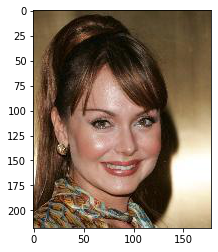

In [ ]:

with h5py.File('mount/My Drive/Colab Notebooks/firstGAN/celeba_dataset/celeba_aligned_small.h5py', 'r') as file_object:
  dataset = file_object['img_align_celeba']
  image = numpy.array(dataset['8.jpg'])
  plt.imshow(image, interpolation='none')